In [1]:
import pandas as pd
import requests

class ScriptData:
    def __init__(self, api_key):
        self.api_key = api_key
        self.data = {}  # I am going to store the data i have recieved from the site

    def fetch_intraday_data(self, script):
        #  Retriving the data from the Vintage API
        url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={script}&interval=1min&apikey={self.api_key}"
        response = requests.get(url)
        
        if response.status_code == 200:
            fetched_data = response.json()["Time Series (1min)"]
            self.data[script] = fetched_data
        else:
            raise ValueError("Failed to fetch intraday data")

    def convert_intraday_data(self, script):
        # Convert data to in data frame form
        intraday_data = self.data.get(script)
        if intraday_data is None:
            raise ValueError("Data not found for script: " + script)
        
        df = pd.DataFrame(intraday_data).transpose()
        df.columns = ['open', 'high', 'low', 'close', 'volume']
        df.index = pd.to_datetime(df.index)
        df = df.astype({'open': float, 'high': float, 'low': float, 'close': float, 'volume': int})
        
        return df

    def __getitem__(self, script):
        # Overloading the getitem operator []
        return self.data.get(script)

    def __setitem__(self, script, data):
        # Overloading the setitem operator []
        self.data[script] = data

    def __contains__(self, script):
        # Overloading the contains operator in
        return script in self.data

In [2]:
api_key = "F1R54VMD6BFKOH4S"
script_data = ScriptData(api_key)

In [3]:
script_data.fetch_intraday_data("GOOGL")
df = script_data.convert_intraday_data("GOOGL")

In [4]:
data = script_data["GOOGL"]

In [5]:
data

{'2023-06-14 19:59:00': {'1. open': '123.5500',
  '2. high': '123.5500',
  '3. low': '123.5500',
  '4. close': '123.5500',
  '5. volume': '428'},
 '2023-06-14 19:52:00': {'1. open': '123.6800',
  '2. high': '123.6800',
  '3. low': '123.6800',
  '4. close': '123.6800',
  '5. volume': '298'},
 '2023-06-14 19:51:00': {'1. open': '123.6200',
  '2. high': '123.6200',
  '3. low': '123.6200',
  '4. close': '123.6200',
  '5. volume': '595'},
 '2023-06-14 19:42:00': {'1. open': '123.7599',
  '2. high': '123.7599',
  '3. low': '123.7599',
  '4. close': '123.7599',
  '5. volume': '307'},
 '2023-06-14 19:40:00': {'1. open': '123.6700',
  '2. high': '123.6700',
  '3. low': '123.6700',
  '4. close': '123.6700',
  '5. volume': '217'},
 '2023-06-14 19:38:00': {'1. open': '123.6700',
  '2. high': '123.6700',
  '3. low': '123.6700',
  '4. close': '123.6700',
  '5. volume': '504'},
 '2023-06-14 19:35:00': {'1. open': '123.7600',
  '2. high': '123.7600',
  '3. low': '123.7600',
  '4. close': '123.7600',
 

In [7]:
if "GOOGL" in script_data:
    print("Data available for GOOGL")

Data available for GOOGL


In [8]:
data = script_data["GOOGL"]
df = script_data.convert_intraday_data("GOOGL")

In [9]:
# Average Closing Price
df = script_data.convert_intraday_data("GOOGL")
average_closing_price = df["close"].mean()
print("Average Closing Price:", average_closing_price)

Average Closing Price: 123.77948100000002


In [10]:
# Total traded volume of stocks for GOOGLE
df = script_data.convert_intraday_data("GOOGL")
total_volume = df["volume"].sum()
print("Total Traded Volume:", total_volume)

Total Traded Volume: 2648245


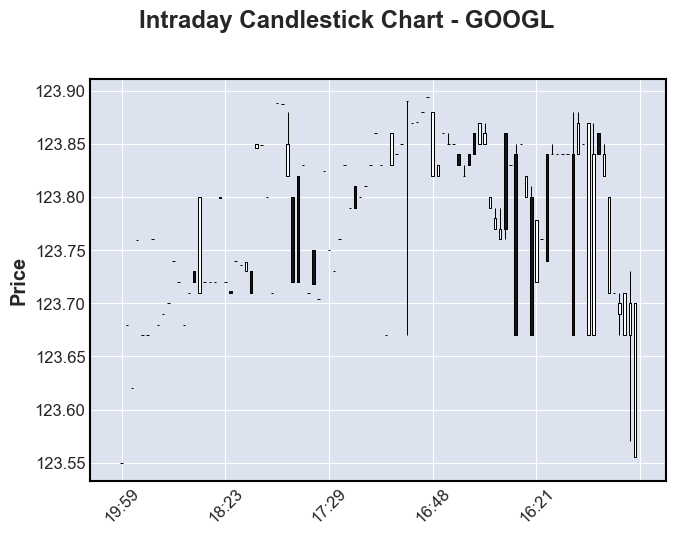

In [11]:
# Plotting the data{Candlestick}
import matplotlib.pyplot as plt
import mplfinance as mpf

df = script_data.convert_intraday_data("GOOGL")
mpf.plot(df, type="candle", title="Intraday Candlestick Chart - GOOGL")
plt.show()